<a href="https://colab.research.google.com/github/fahadalsaud1/Prediction-Arabic-Numbers/blob/main/Final_Alsaud_Fahad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning Final Project DUE: Friday May 7th 11:59pm
Note: Please read all the instructions carefully before starting the project.

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:

Have a large enough dataset

List item

List item

Split your data in training and testing
Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
Try different models on your training dataset - then select the most promising model
Use cross validation to fine tune the model’s parameters such as alpha in lasso
Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
Plot interesting graphs and results
Write and publish your article to medium
Commit your code to your GitHub
Please ensure you handle all the preprocessing before the modeling.

Suggestions for project: You can take a look at the resources given below for choosing a dataset for your project.

Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
Other datasets from Kaggle - https://www.kaggle.com/data/41592


## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub


## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score)


pd.set_option('display.max_columns', None)

In [3]:
# Read the dataset
dataset = pd.read_csv('train.csv')

In [ ]:
dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [ ]:
dataset.shape

(60000, 785)

In [ ]:
# make sure there isnt any nulls
dataset.isnull().sum()
# no null

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [ ]:
dataset.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

Label:  17275    5
Name: label, dtype: int64


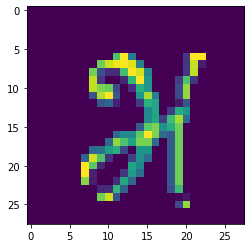

In [ ]:
sample=dataset.sample()
plt.imshow(sample.iloc[:,1:].values.reshape(28,28))
print('Label: ', sample['label'])
# Show a sample test value

In [4]:
# Create the X and y values in order to create a test& train 
X=dataset.drop(columns='label')
y=dataset['label']

In [5]:
# Test and Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Create a baseline Accuracy
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
base = dummy_classifier.score(X_test,y_test)
print(base)
# We know that the accuracy must be bove base accuracy

0.0919871794871795


### Logictic Regression


In [ ]:
# Logistic Regression will be the first method I try to find correlation between the pictures of the numbers and my guessing system
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Print Train accuracy for it
print('Train Accuracy = ', clf.score(X_train,y_train))

Train Accuracy =  0.9834791666666667


In [ ]:
# Print Test accuracy for it
y_pred=clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Test Accuracy = ', acc)

Test Accuracy =  0.9625


In [ ]:
from sklearn.metrics import plot_confusion_matrix

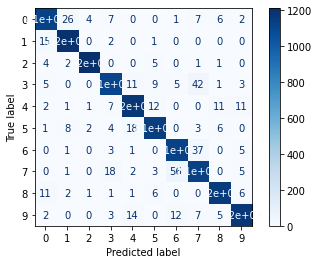

In [ ]:
# Print the confusion matrix 
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues)

The Confusion matrix shows that there are certain numbers that create confusion in the prediction such as 3 and 7. This is due to the fact that the numbers actually look quite similar in the language. 

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred)

array([[1124,   26,    4,    7,    0,    0,    1,    7,    6,    2],
       [  15, 1200,    0,    2,    0,    1,    0,    0,    0,    0],
       [   4,    2, 1211,    0,    0,    5,    0,    1,    1,    0],
       [   5,    0,    0, 1108,   11,    9,    5,   42,    1,    3],
       [   2,    1,    1,    7, 1176,   12,    0,    0,   11,   11],
       [   1,    8,    2,    4,   18, 1146,    0,    3,    6,    0],
       [   0,    1,    0,    3,    1,    0, 1122,   37,    0,    5],
       [   0,    1,    0,   18,    2,    3,   56, 1134,    0,    5],
       [  11,    2,    1,    1,    1,    6,    0,    0, 1158,    6],
       [   2,    0,    0,    3,   14,    0,   12,    7,    5, 1171]])

Real Label:  9
Predicted Label:  4


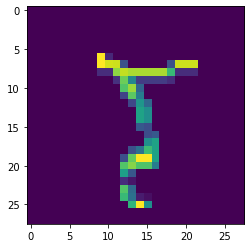

Real Label:  7
Predicted Label:  3


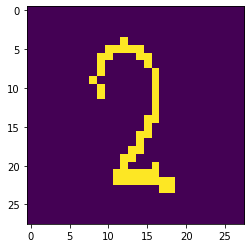

Real Label:  9
Predicted Label:  4


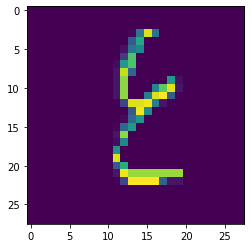

Real Label:  6
Predicted Label:  3


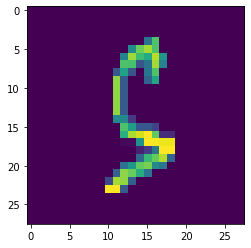

Real Label:  4
Predicted Label:  3


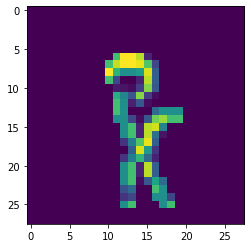

Real Label:  2
Predicted Label:  5


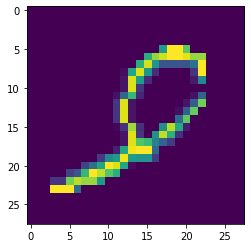

Real Label:  6
Predicted Label:  7


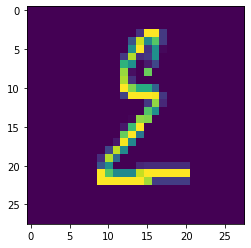

Real Label:  6
Predicted Label:  1


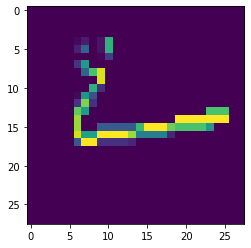

Real Label:  2
Predicted Label:  5


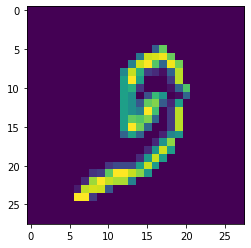

Real Label:  4
Predicted Label:  5


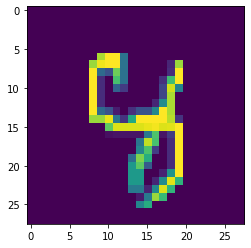

Real Label:  7
Predicted Label:  3


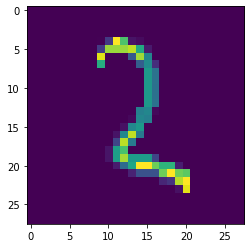

Real Label:  5
Predicted Label:  4


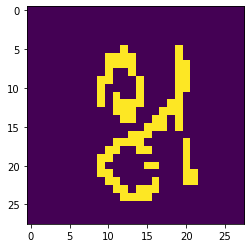

Real Label:  7
Predicted Label:  3


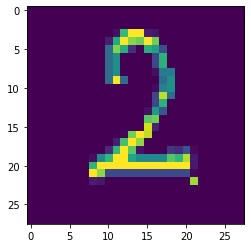

Real Label:  7
Predicted Label:  6


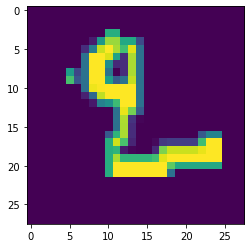

Real Label:  5
Predicted Label:  8


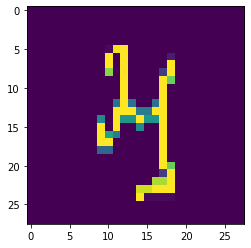

Real Label:  5
Predicted Label:  8


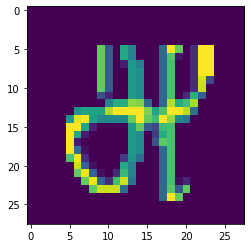

Real Label:  7
Predicted Label:  9


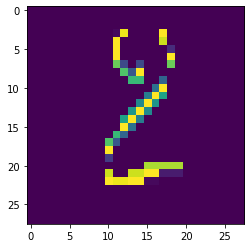

Real Label:  3
Predicted Label:  7


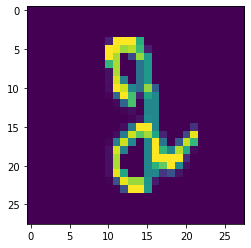

Real Label:  7
Predicted Label:  6


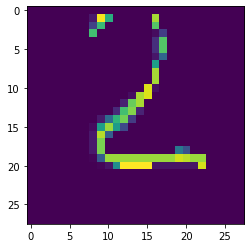

Real Label:  2
Predicted Label:  0


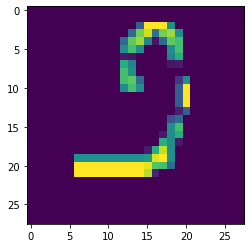

Real Label:  4
Predicted Label:  3


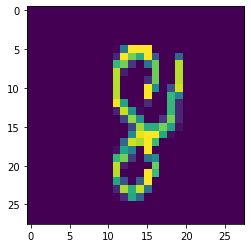

Real Label:  6
Predicted Label:  9


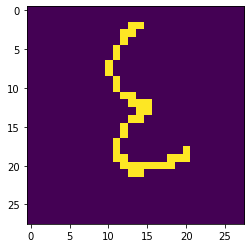

Real Label:  2
Predicted Label:  5


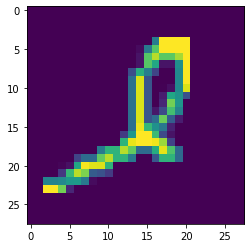

Real Label:  6
Predicted Label:  9


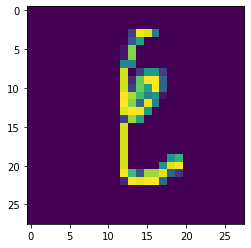

Real Label:  4
Predicted Label:  5


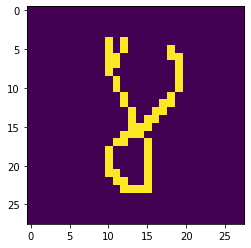

Real Label:  9
Predicted Label:  6


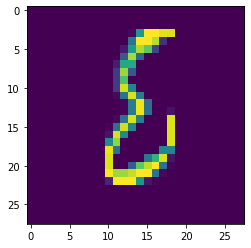

Real Label:  5
Predicted Label:  4


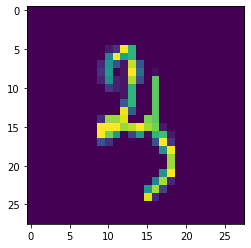

Real Label:  9
Predicted Label:  8


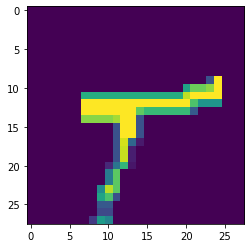

Real Label:  9
Predicted Label:  6


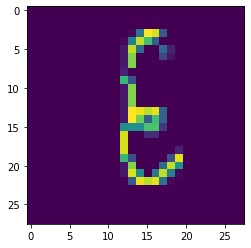

Real Label:  6
Predicted Label:  7


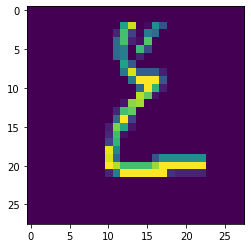

Real Label:  7
Predicted Label:  6


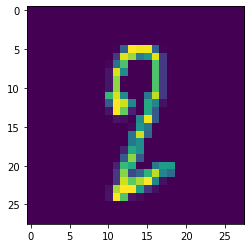

Real Label:  3
Predicted Label:  5


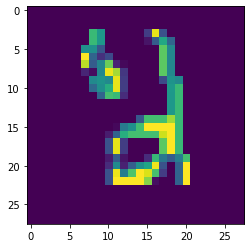

Real Label:  3
Predicted Label:  4


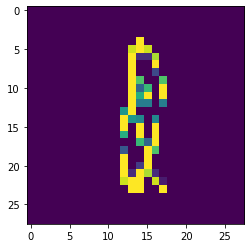

Real Label:  3
Predicted Label:  0


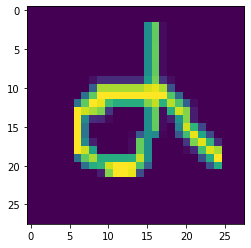

Real Label:  9
Predicted Label:  6


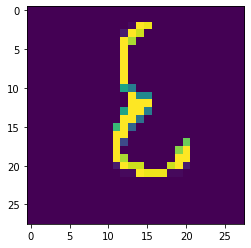

Real Label:  3
Predicted Label:  5


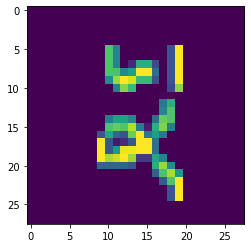

Real Label:  9
Predicted Label:  7


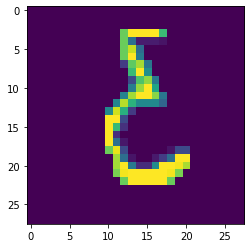

Real Label:  0
Predicted Label:  1


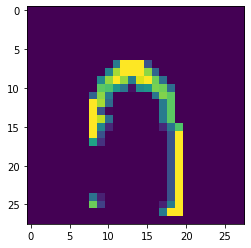

Real Label:  0
Predicted Label:  1


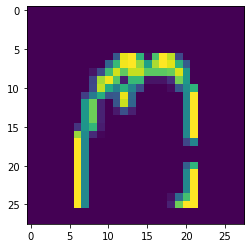

Real Label:  7
Predicted Label:  6


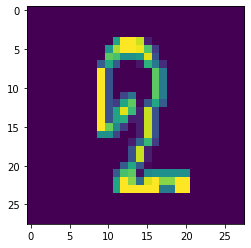

Real Label:  7
Predicted Label:  6


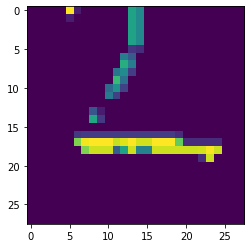

Real Label:  8
Predicted Label:  5


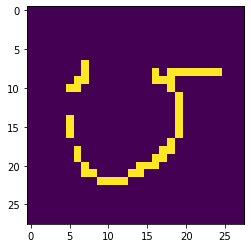

Real Label:  2
Predicted Label:  0


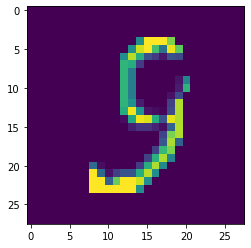

Real Label:  3
Predicted Label:  4


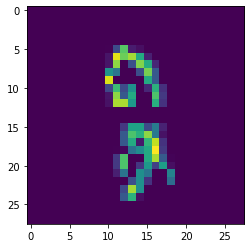

Real Label:  7
Predicted Label:  6


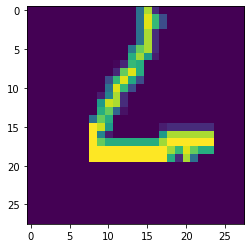

Real Label:  7
Predicted Label:  6


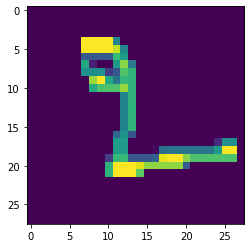

Real Label:  3
Predicted Label:  7


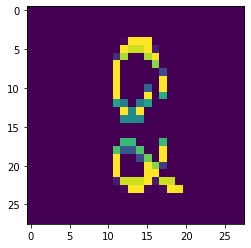

Real Label:  1
Predicted Label:  0


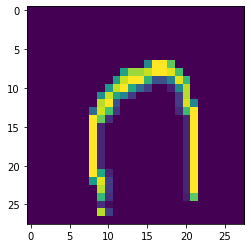

Real Label:  4
Predicted Label:  8


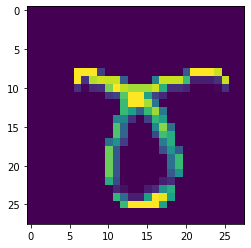

Real Label:  2
Predicted Label:  0


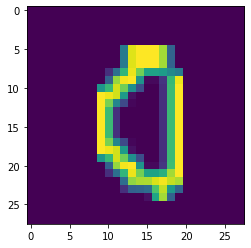

Real Label:  3
Predicted Label:  7


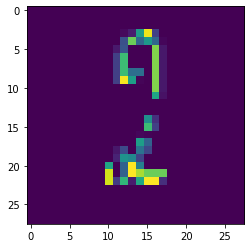

Real Label:  9
Predicted Label:  6


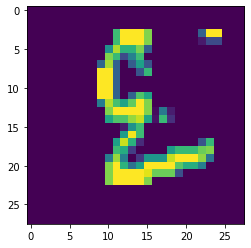

Real Label:  3
Predicted Label:  7


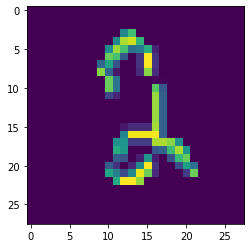

Real Label:  4
Predicted Label:  5


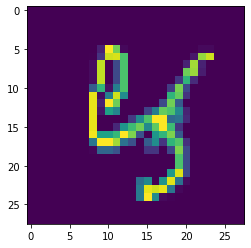

Real Label:  2
Predicted Label:  1


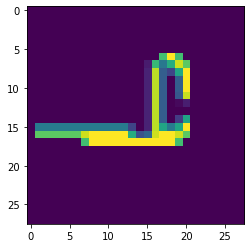

Real Label:  7
Predicted Label:  3


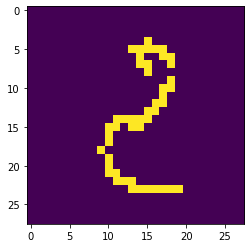

Real Label:  6
Predicted Label:  7


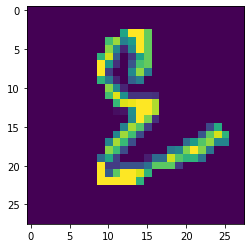

Real Label:  7
Predicted Label:  6


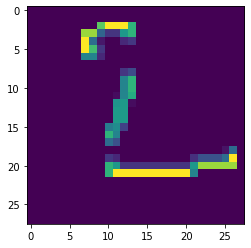

Real Label:  6
Predicted Label:  7


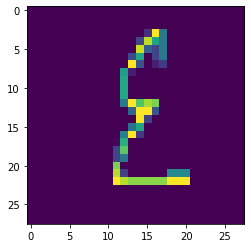

Real Label:  7
Predicted Label:  6


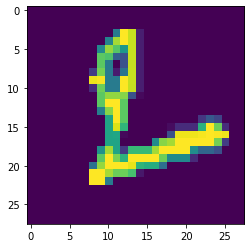

Real Label:  1
Predicted Label:  0


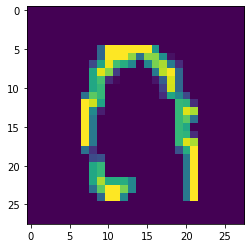

Real Label:  3
Predicted Label:  7


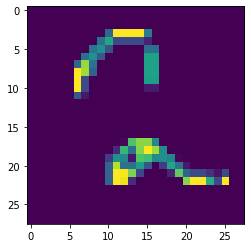

Real Label:  8
Predicted Label:  1


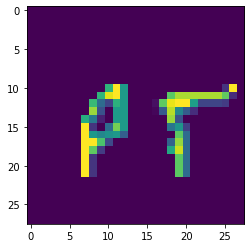

Real Label:  8
Predicted Label:  0


KeyboardInterrupt: ignored

In [ ]:
# Although seemingly simple, this prediction model was quite sophisticated in predicted the numbers.
for ii,pred in enumerate(y_pred):
    if pred!=y_test.iloc[ii]:
        plt.imshow(X_test.iloc[ii].values.reshape(28,28))
        print('Real Label: ', y_test.iloc[ii])
        print('Predicted Label: ', y_pred[ii])
        plt.show()

### Bagging Classifier

In [ ]:
model = BaggingClassifier(random_state = 42)

In [ ]:
# Fit the model during bagging classifier
model.fit(X_train, y_train)
pred_train=model.predict(X_train)
acc = accuracy_score(y_train, pred_train)
print('Train Accuracy = ', acc)

Train Accuracy =  0.9983541666666667


In [ ]:
# Print the test accuracy
pred = model.predict(X_test)
acc = accuracy_score(y_test, pred)
print('Test Accuracy = ', acc)

Test Accuracy =  0.95175


### Random Forest

In [ ]:
# Create a random forest, train and test set.
X_train = X_train.astype(float) / 255.
X_test = X_test.astype(float) / 255.

In [ ]:
rf= RandomForestClassifier(max_depth=10,n_estimators=10, random_state=0,max_features = 'sqrt',bootstrap = True)

In [ ]:
# Cross validate the random forest. 
cv_results = cross_validate(rf, X_train, y_train, cv=5,scoring=['accuracy'])
cv_results

{'fit_time': array([1.57850528, 1.5192287 , 1.55481219, 1.5134151 , 1.53067279]),
 'score_time': array([0.04105449, 0.04196095, 0.04135537, 0.04168367, 0.04373765]),
 'test_accuracy': array([0.93875   , 0.9384375 , 0.94125   , 0.9425    , 0.94072917])}

In [ ]:
#print('Accuracy ',np.abs(cv_results['accuracy']).mean())

KeyError: ignored

In [ ]:
# Fit the random forest
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Print Train Accuracy
print('Train Accuracy = ', rf.score(X_train,y_train))

Train Accuracy =  0.9522083333333333


In [ ]:
# Print Test Accuracy
y_pred=rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Test Accuracy = ', acc)

Test Accuracy =  0.9419166666666666


**Conclusion**
Overall, this prediction methodology proved to be a succcesful endeavor. Through the use of a multitude of different techniques, such as logistic regression, baggin, random forest, and more, I have created an accurate way to predict Arabic numbers from pictures and diagrams. Although every classification proved to be accurate (over 90%), the bagging classifier seemed to be the most precise and accurate with an accuracy over 99.8%.